In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## <span style = 'background :lightblue'>STEP 1 : Data Collection</span>

In [2]:
filepath_iris = r"E:\STUDY\ML PROJECTS\classification project\Iris.csv"

In [3]:
iris = pd.read_csv(filepath_iris , header = 0 ,index_col= 0 )

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## <span style = 'background :lightblue'>STEP 2 : Basic information about data</span>

#### (i) For finding number of rows and columns

In [5]:
iris.shape

(150, 5)

#### (ii) To see number of null values , datatypes and memory usage

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### INSIGHTS :
- No NaN value in any column

#### (iii) Finding Duplicate rows

In [7]:
iris[iris.duplicated(keep = 'first')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
35,4.9,3.1,1.5,0.1,Iris-setosa
38,4.9,3.1,1.5,0.1,Iris-setosa
143,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
# Dropping duplicate values
iris.drop_duplicates(inplace = True , ignore_index=True)

In [9]:
iris.index

RangeIndex(start=0, stop=147, step=1)

#### (iv) Applying basic statstical computations on the dataset

- Extreme values (min & max values), 
- count of data points, 
- Quantiles, 
- mean ,
- standard deviation, etc.

In [10]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### <span style = 'background :lightgreen'>INSIGHTS</span>

#### Rough estimates:<br>

For Features : **PetalLengthCm** , **PetalWidthCm**   <br>
**median >mean** <br>
Therefore , seems like left skewed distribution. <br>

#### (v) Fetching numerical and categorical columns

In [11]:
def num_cat_col_list(DF) : 
    
    from pandas.api.types import is_string_dtype, is_numeric_dtype

    
    num_list = []
    cat_list = []

    for column in DF:

        if is_numeric_dtype(DF[column]):
            num_list.append(column)

        elif is_string_dtype(DF[column]):
            cat_list.append(column)

    return (num_list , cat_list)

In [12]:
num_list , cat_list = num_cat_col_list(iris)

print("\33[1mNumerical column :\33[0m ",num_list)
print()
print("\33[1mCategorical column :\33[0m ",cat_list)

Numerical column :  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Categorical column :  ['Species']


#### (vi) finding unique values in the categorical attributes

In [13]:
for col in cat_list:
    
    print(f"\33[1m{col} :\33[0m " ,iris[col].unique(),"\n")

Species :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



In [14]:
def target_col_cat_rename(column_name ,DF):
    
    DF[column_name] = DF[column_name].str.split('-').str.get(1)
    return DF

In [15]:
df = target_col_cat_rename(column_name= 'Species' , DF = iris)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## <span style = 'background :lightblue'>STEP 3 : UNIVARIATE ANALYSIS</span>

### (i) Histogram-kde  for Numerical  attributes.

In [20]:
def hist_kde_plot(DF , num_list , Hue =  None ):
    
    total_size1 = len(num_list) 

    n_cols1 = 2
    n_rows1 = int(np.ceil(total_size1/n_cols1))

    fig1,axes1 = plt.subplots(nrows = n_rows1 ,ncols = n_cols1 , figsize = (12,8))

    i = 0
    j = 0

    fig1.suptitle("HISTOGRAM-Kde Plot \n", fontweight="bold" ,fontsize=20)


    for col in num_list:


        axes2 = sns.histplot(ax = axes1[i,j], data = DF , x = col ,kde =  True ,
                             bins = 20 , hue = Hue )
        fig1.tight_layout()

        axes2.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        if j == n_cols1 -1:

            i +=1
            j = 0

        else :
            j+=1  


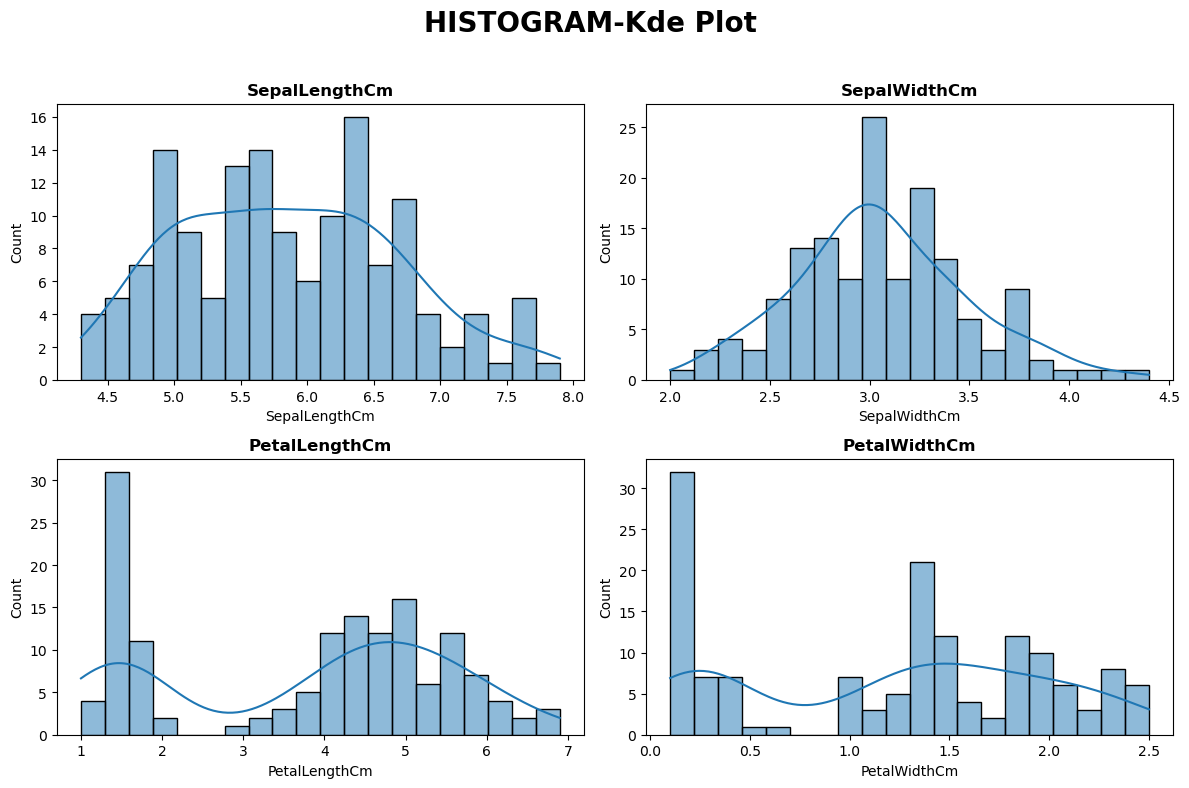

In [21]:
hist_kde_plot(DF = df, num_list=num_list)

### INSIGHTS

**Almost Nommally Distributed Features** : SepalLength , SepalWidth 

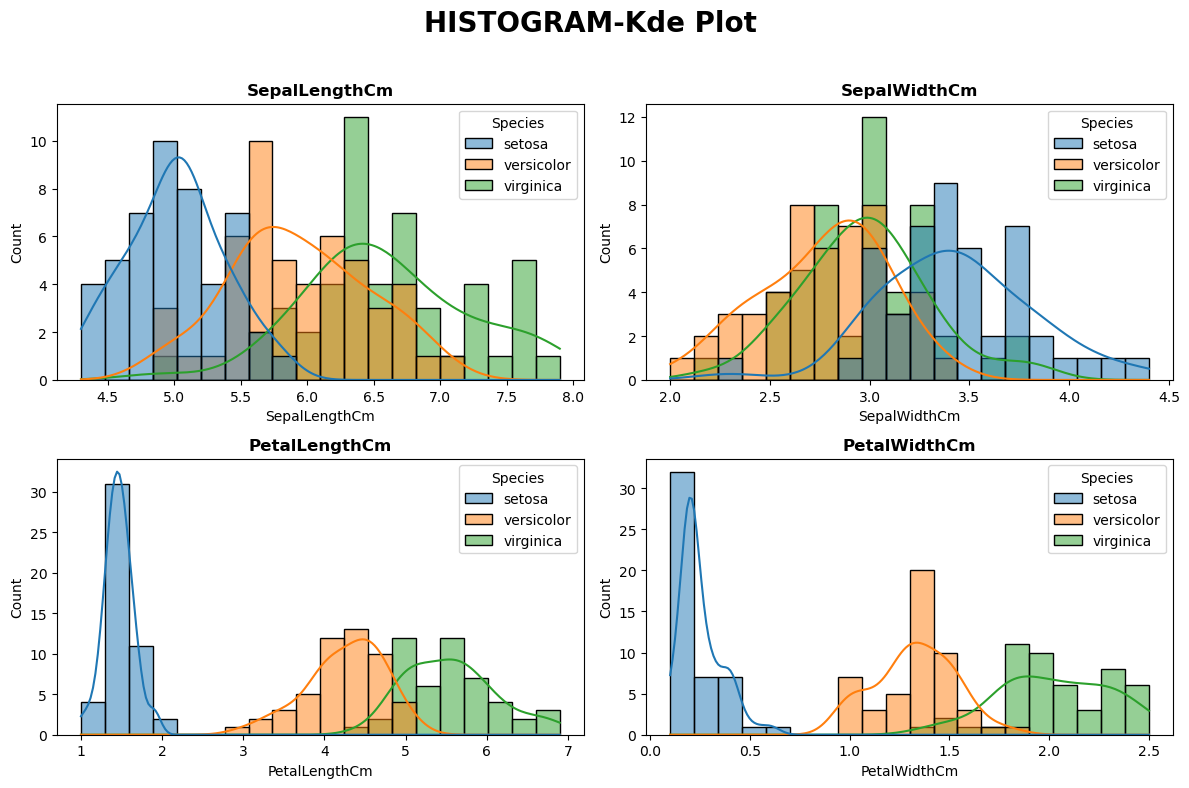

In [22]:
hist_kde_plot(DF = df, num_list=num_list , Hue= 'Species')

### (ii) countplot for  categorical attributes 

In [43]:
def countplot_cat_col(DF,cat_list):
    
    total_size2 = len(cat_list)

    n_cols2 = 2
    n_rows2 = int(np.ceil(total_size2/n_cols2))

    fig3,axes3 = plt.subplots(nrows = n_rows2 ,ncols = n_cols2 , figsize = (7,3.5))
    fig3.tight_layout()

    i = 0
    
    fig3.suptitle("COUNTPLOTS \n", fontweight="bold" ,fontsize=20)

    for col in cat_list:

        fig3.tight_layout()

        axes4 = sns.countplot(ax = axes3[i], data = DF , x = col ,hue = col )

        axes4.set(xticklabels=[])
        axes4.set(xlabel=None)
        axes4.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        axes4.set(ylabel='Frequency')
        axes4.grid(visible=True ,axis ='y')
        

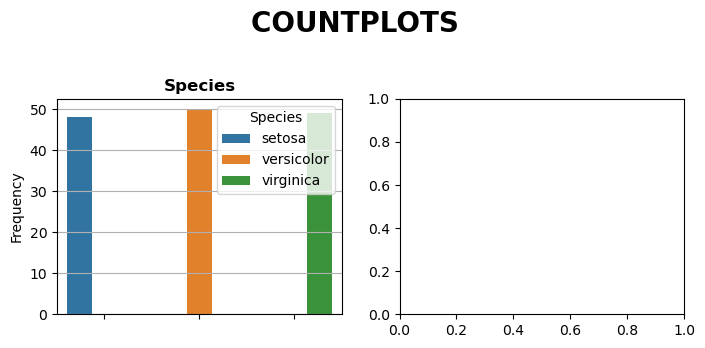

In [44]:
countplot_cat_col(DF = df , cat_list=cat_list)

### (iii) Boxplot for numerical attributes for finding the outleirs

In [61]:
#df.columns

In [63]:
# normally , almost normally or skewed distributed Features.

cols = ['SepalLengthCm' , 'SepalWidthCm']

In [64]:
def boxplot(DF , cols):
    
    total_size_num = len(cols) 
 
    n_cols = 2
    n_rows= int(np.ceil(total_size_num/n_cols))

    fig5, axes5 = plt.subplots(nrows=n_rows, ncols=n_cols , figsize = (10,3),)

    i = 0

    fig5.suptitle("BOXPLOTS\n", fontweight="bold" ,fontsize=20)
    fig5.tight_layout()

    for col in cols:
        
        axes6 = DF[col].plot.box(ax = axes5[i],vert = 0)
        axes6.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        axes6.set(yticklabels=[])
        fig5.tight_layout()
        
        i += 1
        
        if i > n_cols-1:
            
            return


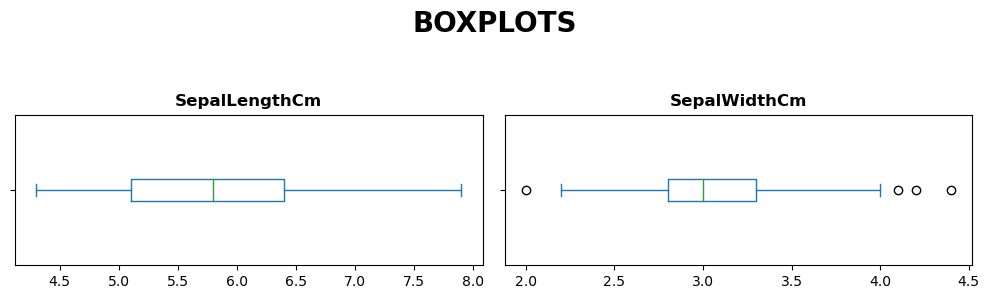

In [65]:
boxplot(DF = df , cols =cols )

### INSIGHTS

**Feature** : SepalWidthcm **has outliers.**

## <span style = 'background :lightblue'>STEP - 4 : Bi-Variate Analysis</span>

- Multivariate analysis is categorized into these three conditions to address various combinations of
  numerical variables and categorical variables.

### (i) Numerical vs. Numerical → heat map or pairplot

In [40]:
def correlation_map(DF):
    
    correlation = round(DF.corr(numeric_only =True),3)
    
    plt.figure(figsize = (4.5,3.5) ,dpi = 120 , layout = 'tight' )
    sns.heatmap(correlation,cmap = 'GnBu' , annot = True)

    plt.show()  

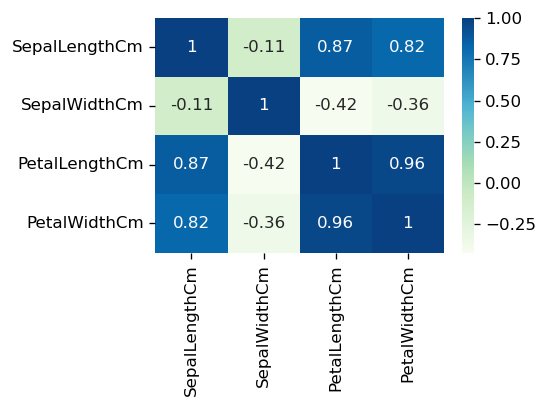

In [41]:
correlation_map(DF = df)

### <span style = 'background :lightblue'>INSIGHTS</span>

- **SepalLength** and **PetalLength** has correlation coeff. = 0.87
- **SepalLength** and **PetalWidth** has correlation coeff. = 0.82
- **PetalLength** and **PetalWidth** has correlation coeff. = 0.96


### (ii) boxplot with hue

In [69]:
def boxplot_hue(DF , numlist , catlist):
    
    total_size_num = len(numlist) 
 
    n_cols=2
    n_rows= int(np.ceil(total_size_num/n_cols))

    fig, axes = plt.subplots(nrows=n_rows, 
                         ncols=n_cols , 
                         figsize = (10,8),
                         )

    i = 0
    j = 0

    for c in range(len(catlist)):

        cat = catlist[c]

        for n in range(len(numlist)):

            num = numlist[n]

            sns.boxplot(x = cat , y = num , data = DF , palette= 'GnBu', ax=axes[i,j])

            if j == n_cols-1:
                i = i + 1
                j = 0

            else:
                j = j + 1


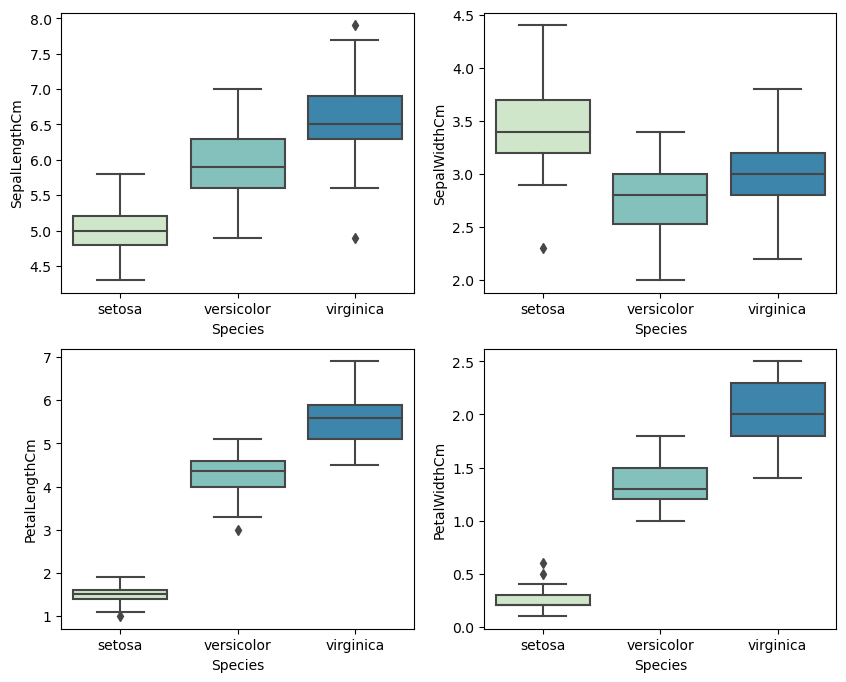

In [71]:
boxplot_hue(DF = df , numlist = num_list , catlist= cat_list)

# we're looking at the outliers corresponding to a particular Feature categoreized by Species.

## STEP - 5 : Multi-Variate Analysis

#### From correlation analysis following conclusions have been made:

- **SepalLength** is highly correlated with **PetalLength** & **PetalWidth** with correlation coefficent >= 0.82

- **PetalLength** is highly correlated with **PetalWidth** with correlation coefficent = 0.96


#### So checking them for multicollinarity

- **Threshold value** of VIF is : VIF >= 10 for dropping a Feature.


#### Syntax : variance_inflation_factor(exog, exog_idx)
- **Recommendation** <br>
 if **VIF** is greater than 5, then the explanatory variable given by **exog_idx** is highly collinear 
 with the other explanatory variables, and the parameter estimates will have large standard errors    
 because of this.



In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [73]:
df_iris = df.copy()

In [74]:
df_iris.dropna(inplace = True)

In [75]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [76]:
mc_feat = ['SepalLengthCm', 'PetalLengthCm','PetalWidthCm']

In [77]:
# Defining custom function for calculating VIF

def compute_vif(feature_list ,dataframe):
    
    X = dataframe[feature_list]
    
    # Dropping any NaN values
    X.dropna(inplace = True)
    
    # Adding constant column in X
    X  = add_constant(X ,prepend=True)
    
    # Creating DF for storing VIF values
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    
    
    vif['VIF'] = [variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
    
    vif = vif[vif['variable'] != 'const']
    
    return vif

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
compute_vif(feature_list = mc_feat ,dataframe = df_iris)

,variable,VIF
1,SepalLengthCm,4.256917
2,PetalLengthCm,18.922659
3,PetalWidthCm,13.709078


In [80]:
# lets remove 'PetalLengthCm' column

mc_feat.remove('PetalLengthCm')

In [81]:
compute_vif(feature_list = mc_feat ,dataframe = df_iris)

,variable,VIF
1,SepalLengthCm,3.008281
2,PetalWidthCm,3.008281


### Conclusion : 
- We can drop the **PetalLengthCm** Feature. (if needed)
